In [2]:
import nltk                                  # Python library for NLP
from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt              # visualization library
import numpy as np                           # library for scientific computing and matrix operations

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Yanhong\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
# select the lists of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


In [4]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))
labels

array([1., 1., 1., ..., 0., 0., 0.], shape=(10000,))

In [5]:
# def func to pre process the raw text using NTLK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Yanhong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yanhong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yanhong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def process_tweet(tweet):
    # Lowercase
    tweet = tweet.lower()

    # Tokenize
    tokens = word_tokenize(tweet)

    # Remove punctuation and stopwords
    tokens = [t for t in tokens if t not in string.punctuation]
    tokens = [t for t in tokens if t not in stopwords.words('english')]

    return tokens

In [7]:
# def func to build the freq dict
def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs

In [20]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

freqs

{('followfriday', 1.0): 25,
 ('france_inte', 1.0): 1,
 ('pkuchly57', 1.0): 1,
 ('milipol_paris', 1.0): 1,
 ('top', 1.0): 29,
 ('engaged', 1.0): 7,
 ('members', 1.0): 11,
 ('community', 1.0): 31,
 ('week', 1.0): 71,
 ('lamb2ja', 1.0): 1,
 ('hey', 1.0): 77,
 ('james', 1.0): 7,
 ('odd', 1.0): 1,
 ('please', 1.0): 96,
 ('call', 1.0): 26,
 ('contact', 1.0): 6,
 ('centre', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('able', 1.0): 8,
 ('assist', 1.0): 1,
 ('many', 1.0): 32,
 ('thanks', 1.0): 392,
 ('despiteofficial', 1.0): 1,
 ('listen', 1.0): 11,
 ('last', 1.0): 44,
 ('night', 1.0): 65,
 ('bleed', 1.0): 2,
 ('amazing', 1.0): 48,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('97sides', 1.0): 1,
 ('congrats', 1.0): 21,
 ('yeaaaah', 1.0): 1,
 ('yippppy', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verified', 1.0): 1,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 72,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profile', 1.0): 2,
 ('15', 1.0): 3,
 ('days', 1.0): 36,
 ('bhak

In [24]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ["happy","vacation",'nice', 'good', 'bad', 'sad', 'mad', 'best',
        '❤', ':)', ':(', 'song', 'idea', 'power', 'play']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happy', 196, 25],
 ['vacation', 6, 3],
 ['nice', 99, 18],
 ['good', 234, 99],
 ['bad', 18, 67],
 ['sad', 4, 121],
 ['mad', 3, 9],
 ['best', 64, 22],
 ['❤', 2, 3],
 [':)', 0, 0],
 [':(', 0, 0],
 ['song', 16, 21],
 ['idea', 21, 10],
 ['power', 4, 5],
 ['play', 18, 27]]

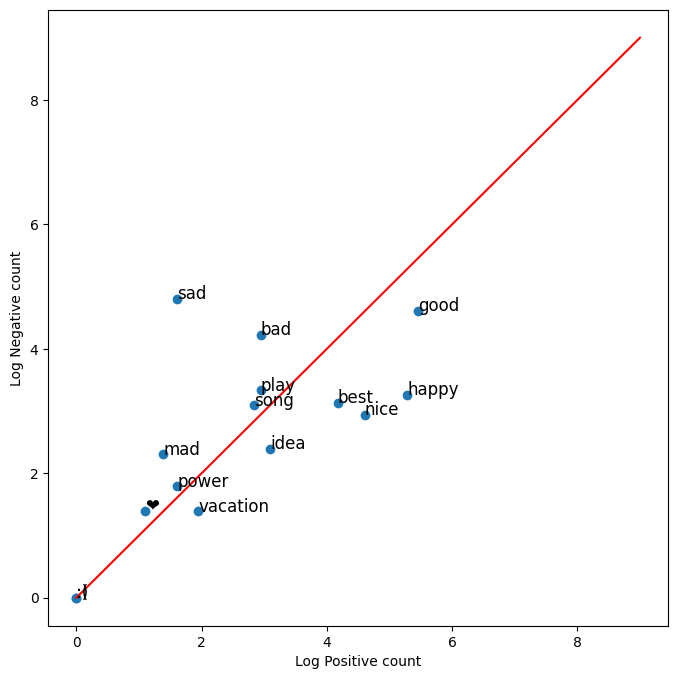

In [25]:
# Data Visualization
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()